# 3.1 - Data Cleaning


![cleaning](images/cleaning.jpg)


$$$$

Una vez que hemos conseguido los datos necesarios, es necesario observar su calidad y orden. No se trata de un análisis exploratorio de los datos, sino de ver como de sucios y desordenados están nuestros datos. Cuando los datos tienen problemas de calidad decimos que los datos están sucios. Los problemas de calidad están relacionados con valores nulos, datos inconsistentes, tipo de dato incorrecto y registros duplicados. 


$$$$
![assess](images/data_assess.png)
$$$$
$$$$

Por otro lado, el orden de los datos está relacionado con su estructura. Como dice [Hadley Wickham](http://hadley.nz/) en su paper [Tidy Data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html), los datos están ordenados cuando:

+ Cada variable forma una columna.
+ Cada observación forma una fila.
+ Cada tipo de unidad obsservacional forma una tabla.
$$$$
![clean](images/data_clean.png)




# Ejemplo...

### Importaciones y carga de datos.

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')  # esto es para quitar prints

pd.set_option('display.max_columns', None)   # mostrar todas las columnas del df
#pd.set_option('display.max_rows', None)   # mostrar todas las filas del df

In [3]:
df=pd.read_csv('../data/vehicles_messy.csv')

df.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,eng_dscr,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,guzzler,trans_dscr,tCharger,sCharger,atvType,fuelType2,rangeA,evMotor,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,423.190476,21,0.0,0,0.0,0.0,0.0,0.0,4.0,2.0,Rear-Wheel Drive,9011,(FFS),-1,1600,0,Regular,Regular Gasoline,-1,-1,25,0.0,0,0.0,0.0,0.0,0.0,0,0,1,0,0,Alfa Romeo,Spider Veloce 2000,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,23.3333,0.0,35.0000,0.0,Two Seaters,1985,-1250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,12.0,4.9,Rear-Wheel Drive,22020,(GUZZLER),-1,3050,0,Regular,Regular Gasoline,-1,-1,14,0.0,0,0.0,0.0,0.0,0.0,0,0,10,0,0,Ferrari,Testarossa,N,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,11.0000,0.0,19.0000,0.0,Two Seaters,1985,-8500,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,329.148148,27,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,Front-Wheel Drive,2100,(FFS),-1,1250,0,Regular,Regular Gasoline,-1,-1,33,0.0,0,0.0,0.0,0.0,0.0,19,77,100,0,0,Dodge,Charger,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,29.0000,0.0,47.0000,0.0,Subcompact Cars,1985,500,NaN,SIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,8.0,5.2,Rear-Wheel Drive,2850,NaN,-1,3050,0,Regular,Regular Gasoline,-1,-1,12,0.0,0,0.0,0.0,0.0,0.0,0,0,1000,0,0,Dodge,B150/B250 Wagon 2WD,N,False,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,12.2222,0.0,16.6667,0.0,Vans,1985,-8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,467.736842,19,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,4-Wheel or All-Wheel Drive,66031,"(FFS,TRBO)",-1,2150,0,Premium,Premium Gasoline,-1,-1,23,0.0,0,0.0,0.0,0.0,0.0,0,0,10000,0,14,Subaru,Legacy AWD Turbo,N,False,0,90,0,0.0,0.0,0.0,0.0,Manual 5-spd,21.0000,0.0,32.0000,0.0,Compact Cars,1993,-4000,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


### Exploración

In [4]:
dim_original=df.shape

df.shape

(37843, 83)

In [5]:
df.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [7]:
df.make.value_counts()

Chevrolet                      3795
Ford                           3102
Dodge                          2513
GMC                            2389
Toyota                         1919
                               ... 
ASC Incorporated                  1
Volga Associated Automobile       1
Panoz Auto-Development            1
Panos                             1
Mahindra                          1
Name: make, Length: 133, dtype: int64

In [8]:
df.dtypes

barrels08     float64
barrelsA08    float64
charge120     float64
charge240     float64
city08          int64
               ...   
modifiedOn     object
startStop      object
phevCity        int64
phevHwy         int64
phevComb        int64
Length: 83, dtype: object

In [10]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37843 entries, 0 to 37842
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        37843 non-null  float64
 1   barrelsA08       37843 non-null  float64
 2   charge120        37843 non-null  float64
 3   charge240        37843 non-null  float64
 4   city08           37843 non-null  int64  
 5   city08U          37843 non-null  float64
 6   cityA08          37843 non-null  int64  
 7   cityA08U         37843 non-null  float64
 8   cityCD           37843 non-null  float64
 9   cityE            37843 non-null  float64
 10  cityUF           37843 non-null  float64
 11  co2              37843 non-null  int64  
 12  co2A             37843 non-null  int64  
 13  co2TailpipeAGpm  37843 non-null  float64
 14  co2TailpipeGpm   37843 non-null  float64
 15  comb08           37843 non-null  int64  
 16  comb08U          37843 non-null  float64
 17  combA08     

In [12]:
# columnas con valores nulos

nan_cols=df.isna().sum()

nan_cols[nan_cols>0]

cylinders       123
displ           120
drive          1189
eng_dscr      15403
trany            11
guzzler       35562
trans_dscr    22796
tCharger      32657
sCharger      37177
atvType       34771
fuelType2     36435
rangeA        36440
evMotor       37281
mfrCode       30818
c240Dscr      37806
c240bDscr     37807
startStop     31705
dtype: int64

In [14]:
df.evMotor.unique()

array([nan, '62 KW AC Induction', '50 KW DC', '27 KW AC Induction',
       '67 KW AC Induction', '24 KW AC Synchronous', '288V Ni-MH',
       '330V Ni-MH', '36V Ni-MH', '245V Ni-MH', '158V Ni-MH',
       '202V Ni-MH', '300V Ni-MH', '101V Ni-MH', '275V Ni-MH',
       '126V Li-Ion', '312V Ni-MH', '67 KW AC  Induction', '67 KW AC',
       '102kW AC Induction', '49kW DC Brushless', '56kW AC Induction',
       '49 kW DC Brushless', '85 kW AC Induction', '150 kW', '80 kW DCPM',
       '111 kW', '30 kW DCPM', '270V Li-Ion', '144V Li-Ion',
       '346V Li-Ion', '115V Li-Ion', '49 kW DCPM', '52 kW AC Induction',
       '144V Ni-MH', '125 kW AC Induction', '100 kW DCPM',
       '107 kW AC Induction', '18 kW', '2 @ 150 kw (300 kw)',
       '260 kW AC Induction', '280V Li-Ion', '107 kW AC PMSM',
       '374V Li-Ion', '92 kW DCPM', '266V Li-Ion', '55 kW DCPM',
       '115 kW AC Induction', '68 kW', '220V Li-Ion',
       '225 kW AC Induction', '270 kW AC Induction', '75 kW AC PMSM',
       '82 kW AC

In [16]:
nan_cols[nan_cols>1e4].index

Index(['eng_dscr', 'guzzler', 'trans_dscr', 'tCharger', 'sCharger', 'atvType',
       'fuelType2', 'rangeA', 'evMotor', 'mfrCode', 'c240Dscr', 'c240bDscr',
       'startStop'],
      dtype='object')

### Borrado de columnas con más de 10.000 valores nulos

In [18]:
df.drop(columns=nan_cols[nan_cols>1e4].index, inplace=True)  # borra y sobreescribe

In [19]:
nan_cols=df.isna().sum()

nan_cols[nan_cols>0]

cylinders     123
displ         120
drive        1189
trany          11
dtype: int64

In [20]:
df.shape, dim_original

((37843, 70), (37843, 83))

### Exploración columnas `cylinders` y `displ`

In [31]:
bad_index=df.cylinders[df.cylinders.isna()].index

bad_index[:10]

Int64Index([7138, 7139, 8143, 8144, 8146, 8147, 9212, 9213, 10329, 21413], dtype='int64')

In [32]:
df.iloc[bad_index][['make', 'model', 'fuelType', 'cylinders', 'displ']].fuelType.unique()

array(['Electricity', 'Regular'], dtype=object)

**Espera, son eléctricos, de hecho existe un Mazda con motor rotatorio. Efectivamente no tienen cilindros ni cilindrada**

In [34]:
df[['cylinders', 'displ']]=df[['cylinders', 'displ']].fillna(0)  # rellena con cero lo que es nulo


df[['cylinders', 'displ']].fillna(0, inplace=True)

In [35]:
nan_cols=df.isna().sum()

nan_cols[nan_cols>0]

drive    1189
trany      11
dtype: int64

In [36]:
bad_index=df.cylinders[df.cylinders.isna()].index

bad_index[:10]

Int64Index([], dtype='int64')

### Exploración columna `drive`

In [37]:
bad_index=df.drive[df.drive.isna()].index

bad_index[:10]

Int64Index([7138, 8144, 8147, 18217, 18218, 18219, 18220, 18221, 18222, 18223], dtype='int64')

In [38]:
df.iloc[bad_index][['make', 'model', 'fuelType', 'drive']].head(10)

,make,model,fuelType,drive
7138,Nissan,Altra EV,Electricity,NaN
8144,Ford,Th!nk,Electricity,NaN
8147,Nissan,Hyper-Mini,Electricity,NaN
18217,Alfa Romeo,Spider Veloce 2000,Regular,NaN
18218,Bertone,X1/9,Regular,NaN
18219,Chevrolet,Corvette,Regular,NaN
18220,Chevrolet,Corvette,Regular,NaN
18221,Nissan,300ZX,Regular,NaN
18222,Nissan,300ZX,Regular,NaN
18223,Nissan,300ZX,Regular,NaN


In [39]:
df.drive.unique()

array(['Rear-Wheel Drive', 'Front-Wheel Drive',
       '4-Wheel or All-Wheel Drive', nan, '2-Wheel Drive',
       'All-Wheel Drive', '4-Wheel Drive', 'Part-time 4-Wheel Drive',
       '2-Wheel Drive, Front'], dtype=object)

In [40]:
len(bad_index)

1189

In [42]:
df.iloc[bad_index].model.unique()

array(['Altra EV', 'Th!nk', 'Hyper-Mini', 'Spider Veloce 2000', 'X1/9',
       'Corvette', '300ZX', 'EXP', 'Civic CRX', 'Kenyon 5.0 Cabrio',
       'Countach Lp500s', 'Esprit', 'RX-7', '380SL', 'Spider', 'Fiero',
       'GT V6 2.5', 'Avanti II', 'Biturbo', '911 SC', '928 S', '944',
       'Starlet', 'Rabbit Convertible', 'Lagonda',
       'Saloon/vantage/volante', 'Coupe GT', 'Quattro', '4000',
       '4000 S quattro', '3 Series', '6 Series', 'Camaro',
       'Cavalier Convertible', 'Chevette', 'Laser/Daytona',
       'LeBaron Convertible', 'Maxima', 'Pulsar/Pulsar-NX', 'Sentra',
       '200SX', '300ZX 2x2', 'Charger', 'Colt', 'Conquest', 'Daytona',
       '600 Convertible', 'Laser', 'Mustang', 'Accord', 'Civic',
       'Prelude', 'I-Mark', 'Impulse', 'XJS', 'XJ', 'Capri', 'GLC',
       '190 D 2.2/190 E 2.3', 'Cordia', 'Precis', 'Starion', 'Tredia',
       'Turismo', 'Firebird', '1000', '2000 Sunbird Convertible', 'Fuego',
       '18i', 'Corniche', 'Sedan', 'Celica', 'Celica Supra',
  

**Este es el punto donde siempre hay que decidir. ¿Qué nos conviene más, borrar registros o rellenar con un `unknown`?**

In [44]:
df.drive.fillna('unknown', inplace=True)

In [45]:
nan_cols=df.isna().sum()

nan_cols[nan_cols>0]

trany    11
dtype: int64

In [46]:
df[df.drive=='unknown'].head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,charge240b,createdOn,modifiedOn,phevCity,phevHwy,phevComb
7138,0.240000,0.0,0.0,0.0,81,0.0,0,0.0,0.0,41.0,0.0,0,-1,0.0,0.000000,85,0.0,0,0.0,40.0,0.0,0.0,0.0,0.0,unknown,0,-1,800,0,Electricity,Electricity,-1,-1,91,0.0,0,0.0,0.0,37.0,0.0,0,0,16423,0,0,Nissan,Altra EV,N,False,0,0,90,0.0,0.0,0.0,0.0,NaN,116.2069,0.0,129.6154,0.0,Midsize Station Wagons,2000,2750,0.0,Tue Jan 01 00:00:00 EST 2013,Thu Jul 07 00:00:00 EDT 2016,0,0,0
8144,0.312000,0.0,0.0,0.0,74,0.0,0,0.0,0.0,46.0,0.0,0,-1,0.0,0.000000,65,0.0,0,0.0,52.0,0.0,0.0,0.0,0.0,unknown,0,-1,1000,0,Electricity,Electricity,-1,-1,58,0.0,0,0.0,0.0,59.0,0.0,0,0,17329,0,0,Ford,Th!nk,N,False,0,0,29,0.0,0.0,0.0,0.0,NaN,105.3125,0.0,82.1951,0.0,Two Seaters,2001,1750,0.0,Tue Jan 01 00:00:00 EST 2013,Thu Jul 07 00:00:00 EDT 2016,0,0,0
8147,0.270000,0.0,0.0,0.0,84,0.0,0,0.0,0.0,40.0,0.0,0,-1,0.0,0.000000,75,0.0,0,0.0,45.0,0.0,0.0,0.0,0.0,unknown,0,-1,900,0,Electricity,Electricity,-1,-1,66,0.0,0,0.0,0.0,51.0,0.0,0,0,17331,0,0,Nissan,Hyper-Mini,N,False,0,0,33,0.0,0.0,0.0,0.0,NaN,120.3571,0.0,93.6111,0.0,Two Seaters,2001,2250,0.0,Tue Jan 01 00:00:00 EST 2013,Thu Jul 07 00:00:00 EDT 2016,0,0,0
18217,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,423.190476,21,0.0,0,0.0,0.0,0.0,0.0,4.0,2.0,unknown,9002,-1,1600,0,Regular,Regular Gasoline,-1,-1,25,0.0,0,0.0,0.0,0.0,0.0,0,0,26561,0,0,Alfa Romeo,Spider Veloce 2000,N,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,23.0000,0.0,35.0000,0.0,Two Seaters,1984,-1250,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
18218,14.982273,0.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,403.954545,22,0.0,0,0.0,0.0,0.0,0.0,4.0,1.5,unknown,12710,-1,1500,0,Regular,Regular Gasoline,-1,-1,26,0.0,0,0.0,0.0,0.0,0.0,0,0,26562,0,0,Bertone,X1/9,N,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,25.0000,0.0,36.0000,0.0,Two Seaters,1984,-750,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0


### Exploración columna `trany`

In [47]:
df.trany.head()

0       Manual 5-spd
1       Manual 5-spd
2       Manual 5-spd
3    Automatic 3-spd
4       Manual 5-spd
Name: trany, dtype: object

In [48]:
df.trany[df.trany.isna()]

7138     NaN
7139     NaN
8143     NaN
8144     NaN
8146     NaN
8147     NaN
9212     NaN
9213     NaN
10329    NaN
19097    NaN
19128    NaN
Name: trany, dtype: object

In [49]:
df.trany.fillna('unknown', inplace=True)

In [50]:
nan_cols=df.isna().sum()

nan_cols[nan_cols>0]

Series([], dtype: int64)

**Hasta aquí la limpieza de nulos.**

### Eliminación de duplicados

In [52]:
df.drop_duplicates().shape==df.shape    # NO hay duplicados

True

In [53]:
# estas dos son equivalentes

df=df.drop_duplicates()

df.drop_duplicates(inplace=True)

In [55]:
#help(df.drop_duplicates())

### Columnas constantes o de baja varianza

Nos fijaremos en las columnas numéricas.

In [60]:
# columnas ctes

cte_cols=[]


for c in df.select_dtypes(include=np.number):   # para cada columna numerica
    
    if len(df[c].unique())==1:
        cte_cols.append(c)
        
    '''
    if df[c].std()==0:
        cte_cols.append(c)
    
    '''

cte_cols

['charge120']

In [62]:
# columnas ctes

cte_str_cols=[]


for c in df.select_dtypes(include='object'):   # para cada columna NO numerica
    
    if len(df[c].unique())==1:
        cte_str_cols.append(c)

cte_str_cols

[]

In [63]:
df.drop(columns=cte_cols, inplace=True)

In [64]:
df.shape

(37843, 69)

In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
barrels08,37843.0,17.532506,4.575950,0.06,14.33087,17.347895,20.600625,47.087143
barrelsA08,37843.0,0.216169,1.141527,0.00,0.00000,0.000000,0.000000,18.311667
charge240,37843.0,0.023531,0.427647,0.00,0.00000,0.000000,0.000000,12.000000
city08,37843.0,17.941389,6.660360,6.00,15.00000,17.000000,20.000000,138.000000
city08U,37843.0,4.042737,9.645820,0.00,0.00000,0.000000,0.000000,138.304000
cityA08,37843.0,0.520149,3.837874,0.00,0.00000,0.000000,0.000000,127.000000
cityA08U,37843.0,0.327163,3.542596,0.00,0.00000,0.000000,0.000000,127.093000
cityCD,37843.0,0.000406,0.039918,0.00,0.00000,0.000000,0.000000,5.350000
cityE,37843.0,0.184790,2.904558,0.00,0.00000,0.000000,0.000000,122.000000
cityUF,37843.0,0.000706,0.019458,0.00,0.00000,0.000000,0.000000,0.849000


In [67]:
# columnas de baja varianza

low_var=[]

for c in df.select_dtypes(include=np.number):  # para cada columna numerica....
    
    
    minimo=df[c].min()
    
    per_90=np.percentile(df[c], 90)
    
    if minimo >= per_90:
        low_var.append(c)

        
len(low_var)

32

In [68]:
df.drop(columns=low_var, inplace=True)

In [69]:
df.shape, dim_original

((37843, 37), (37843, 83))

### Outliers (datos atípicos)

Outlier se refiere a esos registros con valores extremos, fuera del rango intercuartil. Dichos valores podrían ser datos verdaderos o fallos de registro. Sea como fuere, se suelen eliminar estos registros porque podrían desplazar la media de una manera ficticia. Esto es, la robustez de los datos. Los datos atípicos 'pesan más' que los datos cercanos a la media. Un solo valor es suficiente para influenciar enormemente la media del conjunto de datos. Esta vez nos fijaremos en los datos por filas.

In [73]:
stats=df.describe().T

stats['IQR']=stats['75%']-stats['25%']

stats.tail()

,count,mean,std,min,25%,50%,75%,max,IQR
pv4,37843.0,33.769125,45.914462,0.0,0.0,0.0,91.0000,192.0000,91.0000
UCity,37843.0,22.587229,9.350163,0.0,18.0,21.0,25.1393,197.5771,7.1393
UHighway,37843.0,33.619221,10.048326,0.0,27.1,33.0,38.1096,159.1000,11.0096
year,37843.0,2000.064398,10.390588,1984.0,1990.0,2001.0,2009.0000,2017.0000,19.0000
youSaveSpend,37843.0,-2658.999022,2553.098329,-22250.0,-4250.0,-2500.0,-750.0000,4000.0000,3500.0000


In [74]:
%pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 7.7 MB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.9/225.9 kB 4.1 MB/s eta 0:00:00m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 8.1 MB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 1.9 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 12.7 MB/s eta 0:00:00 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


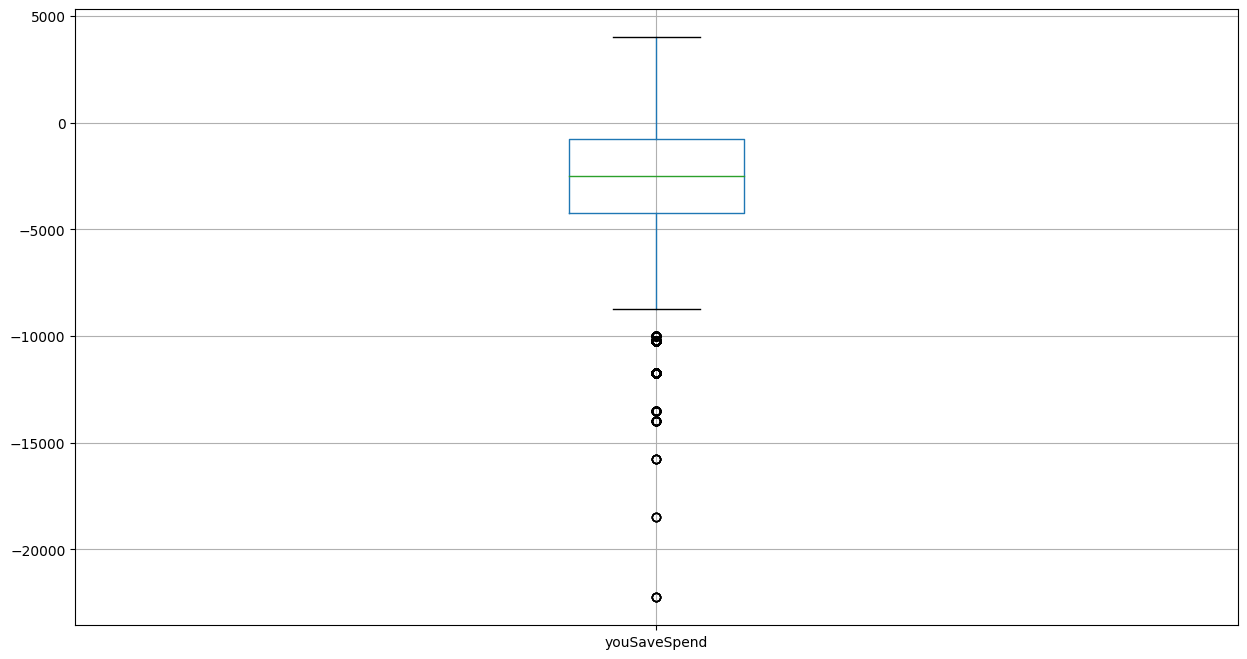

In [77]:
df[['youSaveSpend']].boxplot(figsize=(15, 8));

In [83]:
outliers=pd.DataFrame(columns=stats.index)

outliers.shape

(0, 26)

In [80]:
df.shape

(37843, 37)

In [84]:
for c in stats.index:
    
    iqr=stats.at[c, 'IQR']
    
    cutoff=1.5 * iqr   # test de tukey
    
    lower=stats.at[c, '25%'] - cutoff
    upper=stats.at[c, '75%'] + cutoff
    
    res=df[(df[c] < lower) | (df[c] > upper)].copy()
    
    res['outliers']=c
    
    outliers=outliers.append(res, sort=True)
    
outliers['outliers'].value_counts()

city08U           7299
highway08U        7299
comb08U           7299
engId             6677
lv2               6250
pv2               6239
co2               5854
ghgScore          5815
feScore           5815
hlv               4615
hpv               4614
city08            1470
UCity             1440
lv4               1357
highway08          996
comb08             969
UHighway           893
cylinders          853
co2TailpipeGpm     830
fuelCost08         604
youSaveSpend       604
barrels08          432
displ               43
Name: outliers, dtype: int64

In [ ]:
def get_outliers(stats: pd.DataFrame, threshold: float = 1.5) -> pd.DataFrame:
    
    """
    Esta funcion recibe un dataframe df.describe().T.
    
    Devuelve un dataframe.
    
    :param: stats, pd.DataFrame
    :param: threshold, umbral del test de tukey
    
    :return: pd.DataFrame
    """
    
    outliers=pd.DataFrame(columns=stats.index)

    for c in stats.index:

        iqr=stats.at[c, 'IQR']

        cutoff=threshold * iqr  # test tukey

        lower=stats.at[c, '25%'] - cutoff
        upper=stats.at[c, '75%'] + cutoff

        res=df[(df[c] < lower) | (df[c] > upper)].copy()

        res['outliers']=c

        outliers=outliers.append(res, sort=True)

    
    return outliers

In [85]:
outliers.head()

,UCity,UHighway,VClass,barrels08,city08,city08U,co2,co2TailpipeGpm,comb08,comb08U,createdOn,cylinders,displ,drive,engId,feScore,fuelCost08,fuelType,fuelType1,ghgScore,highway08,highway08U,hlv,hpv,id,lv2,lv4,make,model,modifiedOn,mpgData,outliers,phevBlended,pv2,pv4,trany,year,youSaveSpend
47,11.0,15.0,Vans,32.961,9,0.0,-1,888.7,10,0.0,Tue Jan 01 00:00:00 EST 2013,8.0,5.9,Rear-Wheel Drive,2890,-1,3350,Regular,Regular Gasoline,-1,11,0.0,0,0,1004,0,0,Dodge,B150/B250 Wagon 2WD,Tue Jan 01 00:00:00 EST 2013,N,barrels08,False,0,0,Automatic 3-spd,1985,-10000
58,12.0,15.0,Vans,32.961,10,0.0,-1,888.7,10,0.0,Tue Jan 01 00:00:00 EST 2013,8.0,5.2,Rear-Wheel Drive,2854,-1,3350,Regular,Regular Gasoline,-1,11,0.0,0,0,1005,0,0,Dodge,B350 Wagon 2WD,Tue Jan 01 00:00:00 EST 2013,N,barrels08,False,0,0,Automatic 3-spd,1985,-10000
69,12.0,15.0,Vans,32.961,10,0.0,-1,888.7,10,0.0,Tue Jan 01 00:00:00 EST 2013,8.0,5.2,Rear-Wheel Drive,2850,-1,3350,Regular,Regular Gasoline,-1,11,0.0,0,0,1006,0,0,Dodge,B350 Wagon 2WD,Tue Jan 01 00:00:00 EST 2013,N,barrels08,False,0,0,Automatic 3-spd,1985,-10000
80,11.0,14.0,Vans,32.961,9,0.0,-1,888.7,10,0.0,Tue Jan 01 00:00:00 EST 2013,8.0,5.9,Rear-Wheel Drive,2890,-1,3350,Regular,Regular Gasoline,-1,10,0.0,0,0,1007,0,0,Dodge,B350 Wagon 2WD,Tue Jan 01 00:00:00 EST 2013,N,barrels08,False,0,0,Automatic 3-spd,1985,-10000
275,11.0,16.0,Standard Pickup Trucks,32.961,9,0.0,-1,888.7,10,0.0,Tue Jan 01 00:00:00 EST 2013,8.0,7.4,Rear-Wheel Drive,4880,-1,3350,Regular,Regular Gasoline,-1,12,0.0,0,0,10245,0,0,Chevrolet,C1500 Pickup 2WD,Tue Jan 01 00:00:00 EST 2013,N,barrels08,False,0,0,Automatic 4-spd,1993,-10000


In [86]:
clean_index=[i for i in df.index if i not in outliers.index]

len(clean_index)

16435

In [87]:
df=df.iloc[clean_index]

df.shape

(16435, 37)

In [88]:
len(outliers.index.unique())

21408

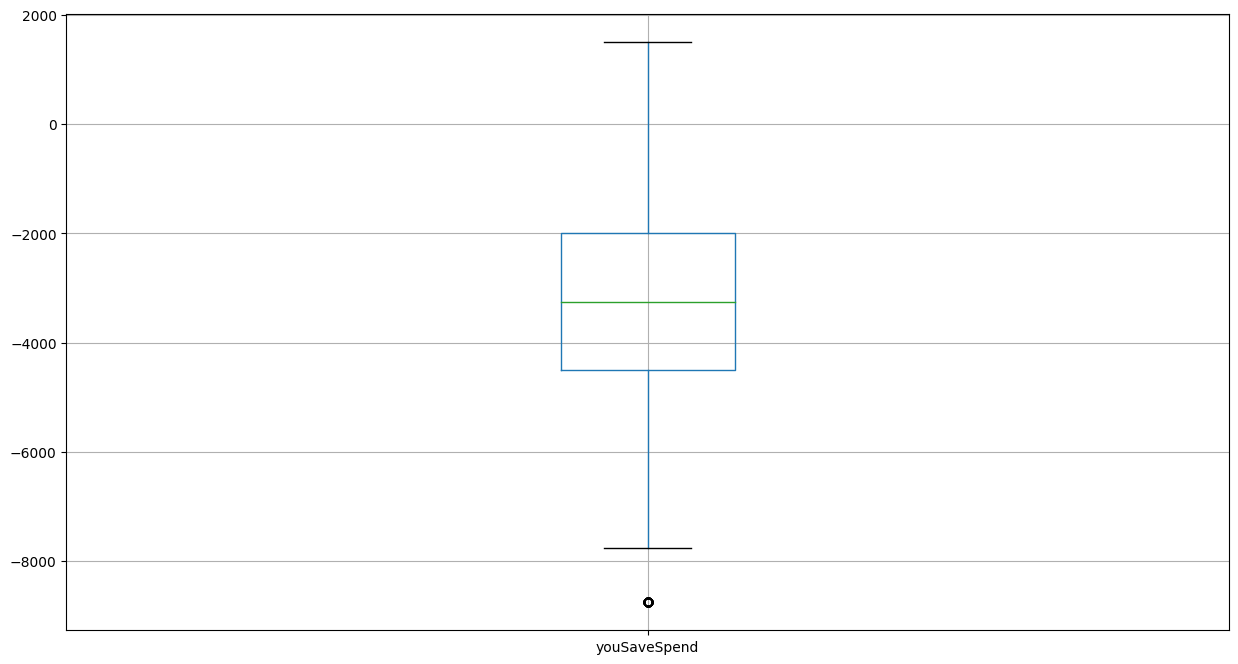

In [89]:
df[['youSaveSpend']].boxplot(figsize=(15, 8));

### Colinealidad  

Columnas con la misma información.

In [90]:
df.corr()

,barrels08,city08,city08U,co2,co2TailpipeGpm,comb08,comb08U,cylinders,displ,engId,feScore,fuelCost08,ghgScore,highway08,highway08U,hlv,hpv,id,lv2,lv4,phevBlended,pv2,pv4,UCity,UHighway,year,youSaveSpend
barrels08,1.000000,-0.936828,NaN,NaN,0.999926,-0.965697,NaN,0.754357,0.812053,0.316692,NaN,0.908665,NaN,-0.946821,NaN,NaN,NaN,-0.255259,NaN,-0.496940,NaN,NaN,-0.511106,-0.937146,-0.947404,-0.311039,-0.908665
city08,-0.936828,1.000000,NaN,NaN,-0.938460,0.978664,NaN,-0.765592,-0.777199,-0.232941,NaN,-0.897694,NaN,0.915187,NaN,NaN,NaN,0.196922,NaN,0.438088,NaN,NaN,0.442449,0.995063,0.916921,0.221777,0.897694
city08U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
co2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
co2TailpipeGpm,0.999926,-0.938460,NaN,NaN,1.000000,-0.967062,NaN,0.753150,0.809569,0.314167,NaN,0.909705,NaN,-0.947805,NaN,NaN,NaN,-0.254208,NaN,-0.496558,NaN,NaN,-0.510716,-0.938735,-0.948353,-0.309060,-0.909705
comb08,-0.965697,0.978664,NaN,NaN,-0.967062,1.000000,NaN,-0.739009,-0.773941,-0.267378,NaN,-0.900787,NaN,0.967196,NaN,NaN,NaN,0.228514,NaN,0.505461,NaN,NaN,0.515042,0.982587,0.968881,0.268560,0.900787
comb08U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cylinders,0.754357,-0.765592,NaN,NaN,0.753150,-0.739009,NaN,1.000000,0.896260,0.178927,NaN,0.741767,NaN,-0.663657,NaN,NaN,NaN,-0.086335,NaN,-0.222524,NaN,NaN,-0.213412,-0.765969,-0.664845,-0.091934,-0.741767
displ,0.812053,-0.777199,NaN,NaN,0.809569,-0.773941,NaN,0.896260,1.000000,0.293457,NaN,0.732014,NaN,-0.727761,NaN,NaN,NaN,-0.151587,NaN,-0.351195,NaN,NaN,-0.353940,-0.778341,-0.729729,-0.178051,-0.732014
engId,0.316692,-0.232941,NaN,NaN,0.314167,-0.267378,NaN,0.178927,0.293457,1.000000,NaN,0.183152,NaN,-0.294589,NaN,NaN,NaN,-0.667322,NaN,-0.197279,NaN,NaN,-0.224908,-0.234772,-0.296454,-0.808215,-0.183152


In [91]:
# columnas ctes

cte_cols=[]

for c in df.select_dtypes(include=np.number):  # para cada columna numerica....
    
    if df[c].std()==0:
        cte_cols.append(c)
        
cte_cols

['city08U',
 'co2',
 'comb08U',
 'feScore',
 'ghgScore',
 'highway08U',
 'hlv',
 'hpv',
 'lv2',
 'pv2']

In [92]:
df.drop(columns=cte_cols, inplace=True)

In [94]:
df.drop('phevBlended', axis=1, inplace=True)

In [95]:
df.corr()

,barrels08,city08,co2TailpipeGpm,comb08,cylinders,displ,engId,fuelCost08,highway08,id,lv4,pv4,UCity,UHighway,year,youSaveSpend
barrels08,1.000000,-0.936828,0.999926,-0.965697,0.754357,0.812053,0.316692,0.908665,-0.946821,-0.255259,-0.496940,-0.511106,-0.937146,-0.947404,-0.311039,-0.908665
city08,-0.936828,1.000000,-0.938460,0.978664,-0.765592,-0.777199,-0.232941,-0.897694,0.915187,0.196922,0.438088,0.442449,0.995063,0.916921,0.221777,0.897694
co2TailpipeGpm,0.999926,-0.938460,1.000000,-0.967062,0.753150,0.809569,0.314167,0.909705,-0.947805,-0.254208,-0.496558,-0.510716,-0.938735,-0.948353,-0.309060,-0.909705
comb08,-0.965697,0.978664,-0.967062,1.000000,-0.739009,-0.773941,-0.267378,-0.900787,0.967196,0.228514,0.505461,0.515042,0.982587,0.968881,0.268560,0.900787
cylinders,0.754357,-0.765592,0.753150,-0.739009,1.000000,0.896260,0.178927,0.741767,-0.663657,-0.086335,-0.222524,-0.213412,-0.765969,-0.664845,-0.091934,-0.741767
displ,0.812053,-0.777199,0.809569,-0.773941,0.896260,1.000000,0.293457,0.732014,-0.727761,-0.151587,-0.351195,-0.353940,-0.778341,-0.729729,-0.178051,-0.732014
engId,0.316692,-0.232941,0.314167,-0.267378,0.178927,0.293457,1.000000,0.183152,-0.294589,-0.667322,-0.197279,-0.224908,-0.234772,-0.296454,-0.808215,-0.183152
fuelCost08,0.908665,-0.897694,0.909705,-0.900787,0.741767,0.732014,0.183152,1.000000,-0.850953,-0.147497,-0.361613,-0.354413,-0.897129,-0.851145,-0.171649,-1.000000
highway08,-0.946821,0.915187,-0.947805,0.967196,-0.663657,-0.727761,-0.294589,-0.850953,1.000000,0.261438,0.575726,0.593918,0.918785,0.997585,0.321557,0.850953
id,-0.255259,0.196922,-0.254208,0.228514,-0.086335,-0.151587,-0.667322,-0.147497,0.261438,1.000000,0.107813,0.129841,0.198311,0.260495,0.743715,0.147497


In [96]:
# criterio de colinealidad

colineales=[]

for c in df._get_numeric_data():
    
    for i in range(len(df.corr())):
        
        if abs(df.corr()[c][i])>0.9 and abs(df.corr()[c][i])<1:
            
            colineales.append(c)
            
colineales=list(set(colineales))

len(colineales)

11

In [97]:
colineales

['city08',
 'co2TailpipeGpm',
 'youSaveSpend',
 'UCity',
 'UHighway',
 'highway08',
 'lv4',
 'fuelCost08',
 'comb08',
 'pv4',
 'barrels08']

In [98]:
df.drop(columns=colineales, inplace=True)

In [99]:
df.shape, dim_original

((16435, 15), (37843, 83))

### Limpieza columna `trany`

In [100]:
df.trany.value_counts()

Automatic 4-spd                     6649
Manual 5-spd                        3236
Automatic 5-spd                     1468
Automatic 3-spd                      960
Manual 4-spd                         888
Manual 6-spd                         793
Automatic (S6)                       753
Automatic 6-spd                      522
Automatic (S5)                       492
Automatic (variable gear ratios)     202
Automatic 7-spd                      137
Automatic (S4)                       127
Manual 3-spd                          76
Automatic (S7)                        50
Automatic (S8)                        44
Auto(AV-S6)                           11
Auto(AM6)                              6
Automatic (AV-S6)                      6
Automatic (A6)                         2
Auto(L4)                               2
Auto(L3)                               2
Automatic 8-spd                        2
Auto(AM7)                              2
unknown                                1
Automatic (AM6) 

In [102]:
import re

re.findall('\d+', 'Automatic (AM6)')[0]

'6'

In [104]:
def limpiar_trany(x):
    
    num=re.findall('\d+', x)
    
    if num:
        return int(num[0])
    else:
        return 0

In [105]:
df['speeds']=df.trany.apply(limpiar_trany)

df.head()

,cylinders,displ,drive,engId,fuelType,fuelType1,id,make,model,mpgData,trany,VClass,year,createdOn,modifiedOn,speeds
0,4.0,2.0,Rear-Wheel Drive,9011,Regular,Regular Gasoline,1,Alfa Romeo,Spider Veloce 2000,Y,Manual 5-spd,Two Seaters,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,5
14,8.0,5.2,Rear-Wheel Drive,2850,Regular,Regular Gasoline,1001,Dodge,B150/B250 Wagon 2WD,N,Automatic 3-spd,Vans,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,3
25,8.0,5.2,Rear-Wheel Drive,2850,Regular,Regular Gasoline,1002,Dodge,B150/B250 Wagon 2WD,N,Manual 4-spd,Vans,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,4
33,8.0,4.6,Front-Wheel Drive,4620,Premium,Premium Gasoline,10027,Cadillac,Seville,Y,Automatic 4-spd,Midsize Cars,1993,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,4
34,8.0,4.9,Front-Wheel Drive,4640,Premium,Premium Gasoline,10028,Cadillac,Seville,N,Automatic 4-spd,Midsize Cars,1993,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,4


In [106]:
df.trany.value_counts()

Automatic 4-spd                     6649
Manual 5-spd                        3236
Automatic 5-spd                     1468
Automatic 3-spd                      960
Manual 4-spd                         888
Manual 6-spd                         793
Automatic (S6)                       753
Automatic 6-spd                      522
Automatic (S5)                       492
Automatic (variable gear ratios)     202
Automatic 7-spd                      137
Automatic (S4)                       127
Manual 3-spd                          76
Automatic (S7)                        50
Automatic (S8)                        44
Auto(AV-S6)                           11
Auto(AM6)                              6
Automatic (AV-S6)                      6
Automatic (A6)                         2
Auto(L4)                               2
Auto(L3)                               2
Automatic 8-spd                        2
Auto(AM7)                              2
unknown                                1
Automatic (AM6) 

In [107]:
def limpiar_auto(x):
    
    x=x.lower()
    
    if 'auto' in x:
        return 'automatic'
    
    elif 'manual' in x:
        return 'manual'
    
    else:
        return 'unknown'

In [109]:
df.trany=df.trany.apply(limpiar_auto)

In [110]:
df.trany.value_counts()

automatic    11441
manual        4993
unknown          1
Name: trany, dtype: int64

In [111]:
df.drop(df[df.trany=='unknown'].index, axis=0, inplace=True)

In [112]:
df.trany.value_counts()

automatic    11441
manual        4993
Name: trany, dtype: int64

In [113]:
df.shape, dim_original

((16434, 16), (37843, 83))

In [122]:
df.drop_duplicates().shape==df.shape

True

## DataFrame Final

In [114]:
df.head()

,cylinders,displ,drive,engId,fuelType,fuelType1,id,make,model,mpgData,trany,VClass,year,createdOn,modifiedOn,speeds
0,4.0,2.0,Rear-Wheel Drive,9011,Regular,Regular Gasoline,1,Alfa Romeo,Spider Veloce 2000,Y,manual,Two Seaters,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,5
14,8.0,5.2,Rear-Wheel Drive,2850,Regular,Regular Gasoline,1001,Dodge,B150/B250 Wagon 2WD,N,automatic,Vans,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,3
25,8.0,5.2,Rear-Wheel Drive,2850,Regular,Regular Gasoline,1002,Dodge,B150/B250 Wagon 2WD,N,manual,Vans,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,4
33,8.0,4.6,Front-Wheel Drive,4620,Premium,Premium Gasoline,10027,Cadillac,Seville,Y,automatic,Midsize Cars,1993,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,4
34,8.0,4.9,Front-Wheel Drive,4640,Premium,Premium Gasoline,10028,Cadillac,Seville,N,automatic,Midsize Cars,1993,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,4


In [115]:
df.reset_index(drop=True, inplace=True)

In [116]:
df.head()

,cylinders,displ,drive,engId,fuelType,fuelType1,id,make,model,mpgData,trany,VClass,year,createdOn,modifiedOn,speeds
0,4.0,2.0,Rear-Wheel Drive,9011,Regular,Regular Gasoline,1,Alfa Romeo,Spider Veloce 2000,Y,manual,Two Seaters,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,5
1,8.0,5.2,Rear-Wheel Drive,2850,Regular,Regular Gasoline,1001,Dodge,B150/B250 Wagon 2WD,N,automatic,Vans,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,3
2,8.0,5.2,Rear-Wheel Drive,2850,Regular,Regular Gasoline,1002,Dodge,B150/B250 Wagon 2WD,N,manual,Vans,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,4
3,8.0,4.6,Front-Wheel Drive,4620,Premium,Premium Gasoline,10027,Cadillac,Seville,Y,automatic,Midsize Cars,1993,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,4
4,8.0,4.9,Front-Wheel Drive,4640,Premium,Premium Gasoline,10028,Cadillac,Seville,N,automatic,Midsize Cars,1993,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,4


In [118]:
%pip install xlwt

  Using cached xlwt-1.3.0-py2.py3-none-any.whl (99 kB)
Note: you may need to restart the kernel to use updated packages.


In [119]:
df.to_excel('../data/vehiculos.xls', index=False)

**Cuidado de no eliminarlo todo....**